Precision (Train): 0.9293
Recall (Train): 0.8455
F1 Score (Train): 0.8854
Predicted probabilities (Train): [0.07577878 0.85994682 0.0990172  ... 0.93532045 0.64874119 0.05459637]
Predicted binary labels (Train): [0 1 0 ... 1 1 0]


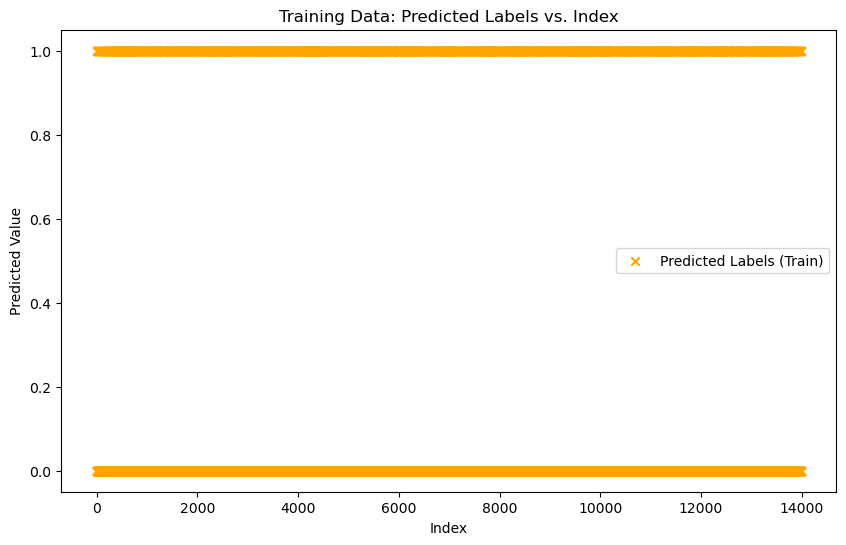

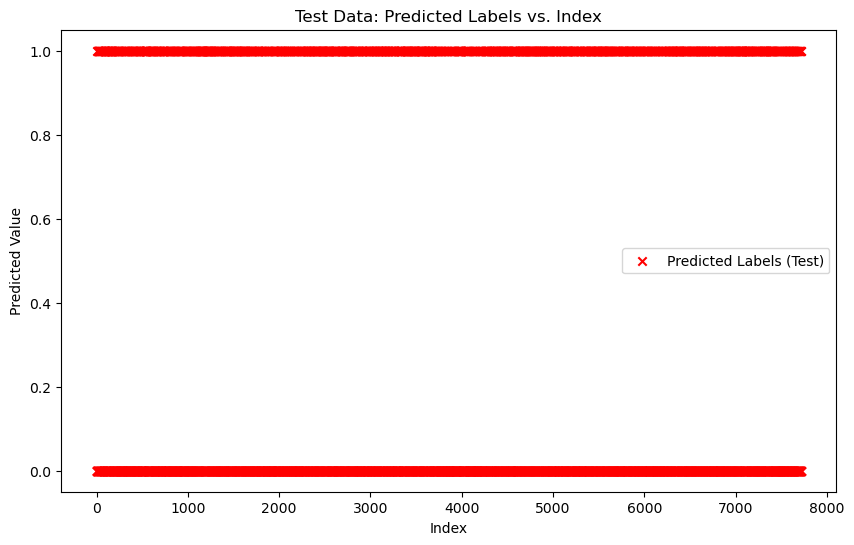

Predicted probabilities (Test): [0.1329623  0.36140312 0.10671127 ... 0.08662339 0.85411409 0.72511368]
Predicted binary labels (Test): [0 0 0 ... 0 1 1]


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sigmoid function with stability adjustment
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Clip values to avoid overflow
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    h = np.clip(h, 1e-10, 1 - 1e-10)  # Avoid log(0)
    cost = -(1 / m) * (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h)))
    return cost

# Gradient descent for logistic regression
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    
    for i in range(iterations):
        h = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (h - y)) / m
        weights -= learning_rate * gradient

    return weights

# Predict function
def predict(X, weights, threshold=0.5):
    probabilities = sigmoid(np.dot(X, weights))
    return (probabilities >= threshold).astype(int)

# Precision, Recall, and F1 Score calculation
def precision_recall_f1(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    fp = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    fn = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    if precision + recall == 0:
        f1 = 0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)
    
    return precision, recall, f1

# Feature scaling function (standardization)
def scale_features(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)

    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std  # Use training mean and std to scale test set
    
    return X_train_scaled, X_test_scaled

# Main function
def main():
    # Load datasets
    train_data_path = 'binary_classification_train.csv'
    test_data_path = 'binary_classification_test.csv'

    train_data = pd.read_csv(train_data_path)
    test_data = pd.read_csv(test_data_path)

    # Extract features and target
    X_train = train_data.iloc[:, :-1].values
    y_train = train_data.iloc[:, -1].values
    X_test = test_data.values

    # Scale features
    X_train, X_test = scale_features(X_train, X_test)

    # Add intercept to feature matrix
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    # Initialize weights
    weights = np.zeros(X_train.shape[1])

    # Hyperparameters
    learning_rate = 0.01
    iterations = 1000

    # Train the model
    weights = gradient_descent(X_train, y_train, weights, learning_rate, iterations)

    # Predict probabilities and binary labels for the training set
    y_train_prob = sigmoid(np.dot(X_train, weights))
    y_train_pred = predict(X_train, weights)

    # Calculate Precision, Recall, and F1 Score for the training set
    precision, recall, f1_train = precision_recall_f1(y_train, y_train_pred)
    
    # Print values with 4 decimal places
    print(f"Precision (Train): {precision:.4f}")
    print(f"Recall (Train): {recall:.4f}")
    print(f"F1 Score (Train): {f1_train:.4f}")

    # Print predicted probabilities and binary labels for the training set
    print("Predicted probabilities (Train):", y_train_prob)
    print("Predicted binary labels (Train):", y_train_pred)

    # Plot predicted labels for the training set
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_train_pred)), y_train_pred, label='Predicted Labels (Train)', color='orange', marker='x')
    plt.xlabel('Index')
    plt.ylabel('Predicted Value')
    plt.title('Training Data: Predicted Labels vs. Index')
    plt.legend()
    plt.show()

    # Predict probabilities and binary labels for the test set
    y_test_prob = sigmoid(np.dot(X_test, weights))
    y_test_pred = predict(X_test, weights)

    # Plot predicted labels for the test set
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_test_pred)), y_test_pred, label='Predicted Labels (Test)', color='red', marker='x')
    plt.xlabel('Index')
    plt.ylabel('Predicted Value')
    plt.title('Test Data: Predicted Labels vs. Index')
    plt.legend()
    plt.show()

    # Output predictions
    print("Predicted probabilities (Test):", y_test_prob)
    print("Predicted binary labels (Test):", y_test_pred)

# Entry point
if __name__ == "__main__":
    main()
